In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


# Model II: Modulated Chaotic Inflation Potentials. See section 3.2 from
 https://arxiv.org/pdf/1805.09483

In [2]:
V = 'V0*(tanh(phi/sqrt(6)) + A*sin(tanh(phi/sqrt(6))/f))**2'
paramters = {'V0': 2e-10, 'A': 0.130383, 'f': 0.129576}
potential = PotentialFunction.from_string(V, param_values=paramters)

In [3]:
#Instancia de la clase background
background = Background(potential, phi0 = 6.2) 

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)
Nend = background.N_end
Nend

70.15015015015015

Figure saved as: figures/potential.png


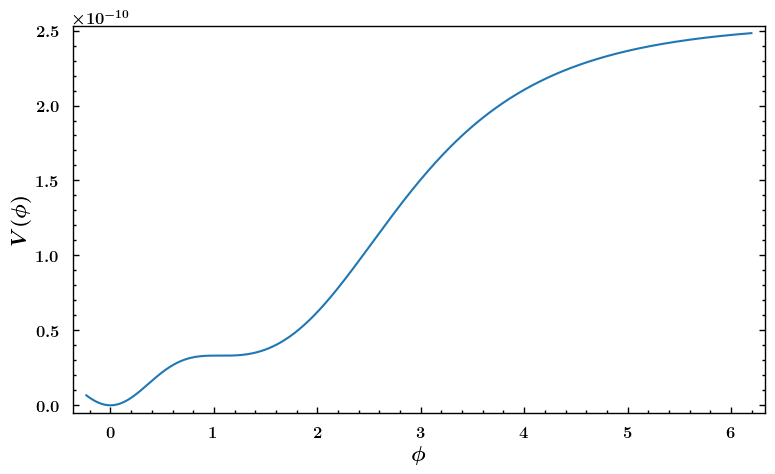

In [5]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)

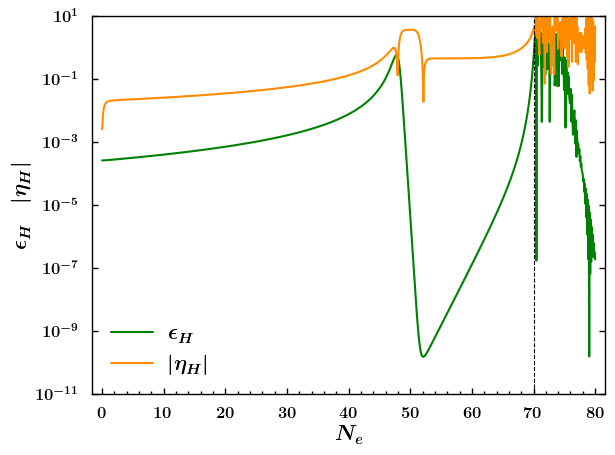

In [6]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linestyle = 'dashed', color = 'k', linewidth = 0.8)

plt.ylim(1e-11, 1e1)
plt.yscale('log')
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


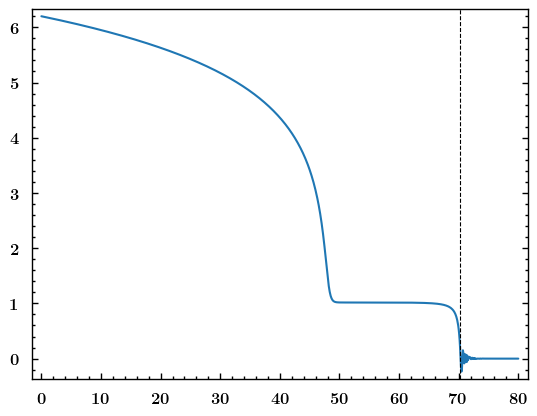

In [7]:
plt.plot(N, phi)
plt.axvline(Nend, linestyle = 'dashed', color = 'k', linewidth = 0.8)


In [8]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 56.2)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot} e-folds')
sol = pert.solver()

El modo 0.05 cruza el horizonte a (13.95015015015015, 0.05) e-folds


In [9]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [10]:
P_s_pivot, P_t_pivot, r_pivot

(2.2355567776324803e-09, 1.650507275265856e-11, 0.007382980793776981)

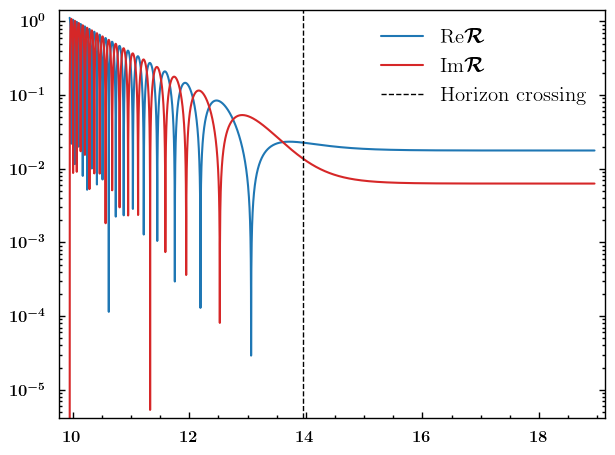

In [11]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [12]:
PS = pert.Power_spectrum(save = True)

k_peak = 5.95\times 10^{+13} Mpc^-1
N_peak = 49.66438477776831
P_s(k_peak) = 0.018374367237687136
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

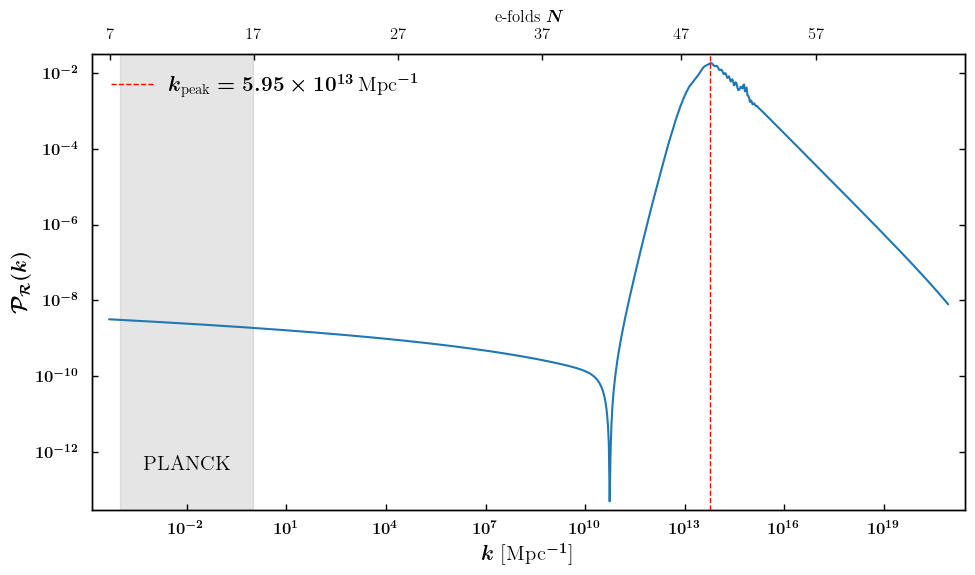

In [13]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save= True)

Figure saved as: Figures/tensor_to_scalar_ratio.png


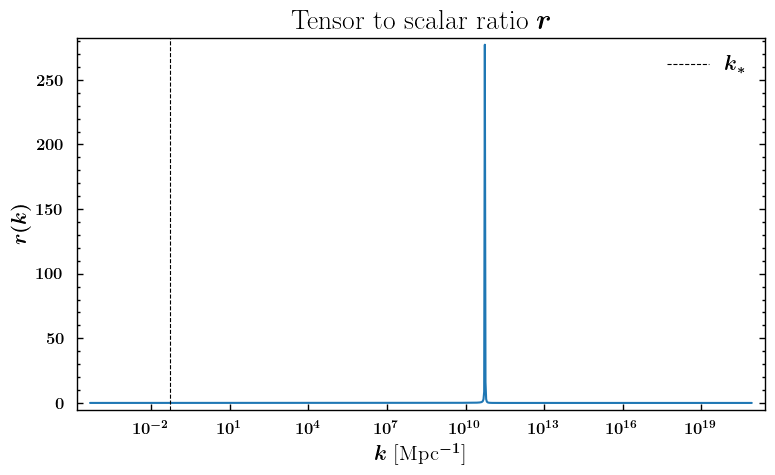

In [14]:
pert.Plot_r(dpi = 100, save =  True)

In [15]:
print(pert.Spectral_tilts)


{'n_s': 0.9448020408636231, 'n_t': -0.0011528652718974294}


## PBH Abundance after re-entry horizon in RD era

In [17]:
pbh = PBHAbundance(pert, delta_c=0.325, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save= True)

fPBH_peak = 0.5135235482712024
MPBH_peak = 1.1296862793122623e-15 M⊙


(1e-20, 10000.0)

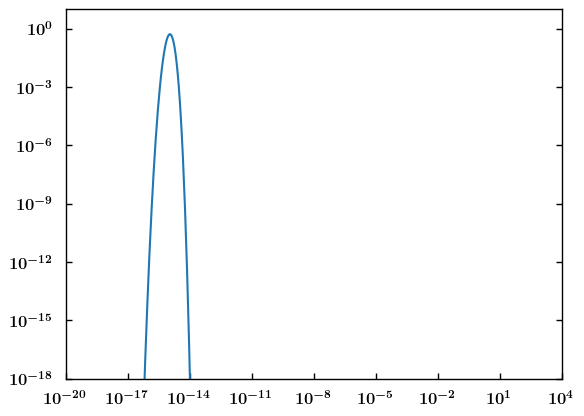

In [18]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-18, 1e1)
plt.xlim(1e-20, 1e4)
